# Designing  the Module class for chemical networks


Here we take a purely conceptual route and leave the implementation for later.

We want to answer the following questions:

- what should a Module take in input?
- what properties should it have?
- what actions should it be able to perform?


In [17]:
import hypernetx as hnx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import warnings 
#init_printing(use_unicode=True)
warnings.simplefilter('ignore')

from sympy import *

class ModuleBase:
    def __init__(self):
        """Module constructor"""

        self.stoichiometric_matrix = None # we would like this to be a sympy Matrix
        self.hypergraph = None  #  this will be built using the Hypergraph library


      
        pass

    def set_stoichiometry(self):
        pass

    def __add__(self, other):
        """Overload the + operator to implement serial combination of modules:
        
        It means implementing Eq XXX 
        """
        return ModuleBase()
    
    def draw(self):
        hnx.draw(self.hypergraph)
    


In [18]:
class Module(ModuleBase):

    def __init__(self, stoichiometric_matrix):
        """Module constructor

        Args:
            stoichiometric_matrix (sympy.Matrix): The stoichiometric matrix of the module
        """

        super().__init__()

        self.stoichiometric_matrix = stoichiometric_matrix
        self.hypergraph = hnx.Hypergraph.from_incidence_matrix(np.array(self.stoichiometric_matrix).astype(np.float64)) #maybe we want integers...

        self.num_reactions = self.stoichiometric_matrix.cols

        command = ""
        for i in range(self.num_reactions):
            command+=f"j{i} "
        self.current_symbols = symbols(command)




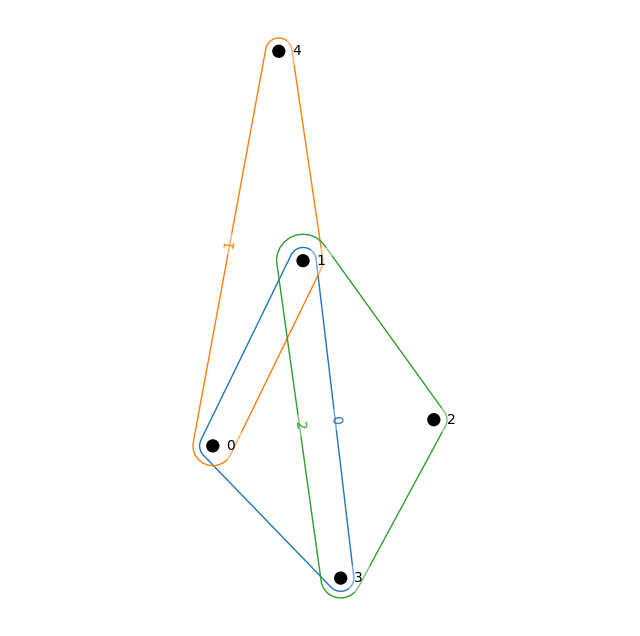

In [19]:

# example of module construction
stoich_matrix_1 = Matrix( [[-1, 1, 0], [1, -1, -1], [0, 0, 1], [-1, 0, -1], [0, 1, 0]] )


module1 = Module(stoich_matrix_1)

module1.draw()

stoich_matrix_2 = Matrix([[-1, 0, 1, 0, 0], # first row of internal
                           [1, -1, 0, -1, 0], 
                           [0, 1, -1, 0, 1], 
                           [0, 0, 0, 1, -1],
                             [0, 0, 0, -1, 0], # first row external 
                             [0, 0, 0, 0, 1],
                             [-1, 0, 0, 0, 0],
                             [0, 0, 1, 0, 0]])

module2 = Module(stoich_matrix_2)

In [21]:
module2.current_symbols

(j0, j1, j2, j3, j4)